# **손실 곡선**

In [52]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2)

In [19]:
#모델 생성 함수
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu',name='hidden1'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
#fit메소드는 학습 과정을 dictionary자료형으로 반환한다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
print(history.history.keys())
#[['손실','정확도']]

dict_keys(['loss', 'accuracy'])


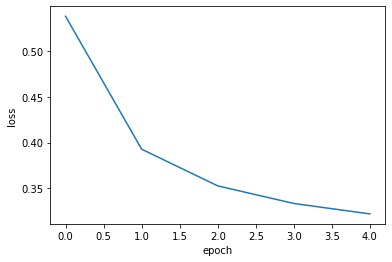

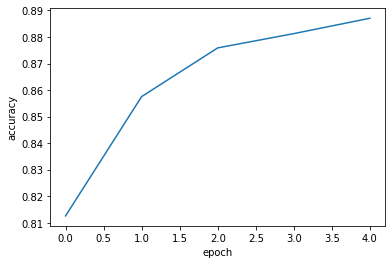

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi=300)
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi=300)
plt.show()

#보는 바와같이 횟수(epoch)가 늘어날수록 손실이 줄어들고 정확도는 올라가는 것을 볼 수 있다.

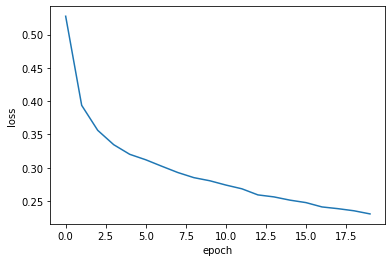

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
#에포크 값을 늘렸다.
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-03', dpi=300)
plt.show()

**검증 손실**

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


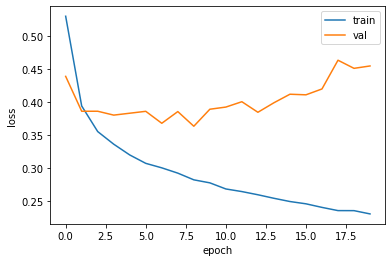

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi=300)
plt.show()
#train:훈련 세트 손실
#val:검증 세트 손실
#훈련세트의 경우 epoch가 늘어날수록 손실이 줄어들지만 검증세트의 경우 epoch가 늘어나도 오히려 손실이 줄어들지 않는다
#따라서 이 모델은 과대적합되었다고 할 수 있다.

In [47]:
model = model_fn()
#적응형 학습률 옵티마이저인 'adam'사용
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
#validation_data:검증세트를 설정
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

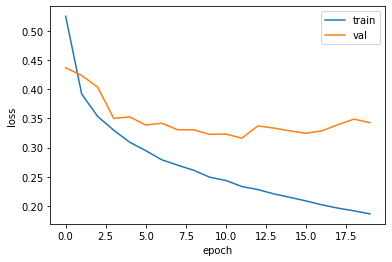

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi=300)
plt.show()
#아래와 같이 과대적합이 조금은 완화된 모습을 볼 수 있다.

# **드롭 아웃**
*훈련과정중 일부 뉴런을 비활성화하여 과대적합을 막는 알고리즘

In [20]:
#30%(0.3)의 뉴런 비활성화
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
#입력층->Flatten->Dense(hidden1)->Dropout->Dense(출력층)
#hidden1 위에 Dropout층을 쌓았으므로 hidden1층의 랜덤한 뉴런 30%의 값이 출력층으로 전달되지 않는다.
#따라서 Dropout층은 일종의 필터같이 작동하는 것을 알 수 있다.

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

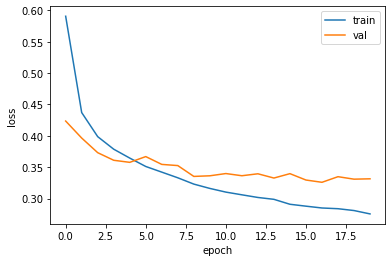

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()
#아래 보이는것과 같이 과대적합이 굉장히 많이 해소되었음을 확인할 수 있다.

# **모델의 저장과 복원**

In [23]:
#가중치만 저장
model.save_weights('model-weights.h5')

In [25]:
#모델 자체를 저장
model.save('model-whole.h5')

In [26]:
#.h5 파일을 찾는 cmd
!ls -al *.h5

-rw-r--r-- 1 root root 332440 Mar  8 07:09 model-weights.h5
-rw-r--r-- 1 root root 981768 Mar  8 07:11 model-whole.h5


In [28]:
#가중치만을 로드할땐 가중치를 저장한 원본 모델과 형태가 같아야한다.
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
#모델을 직접 로드
model = keras.models.load_model('model-whole.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [39]:
import numpy as np

#argmax메서드는 주어진 배열의 최댓값의 인덱스 배열을 반환한다.
#axis:최댓값을 찾을 행렬의 기준이 되는 축을 정한다. -1일경우 주어진 배열의 가장 마지막 축을 기준으로
#predict메서드는 주어진 (넘파이)배열을 입력으로 받아 예측해준다.
#이 모델은 10개의 출력층 뉴런(10개의 클래스)를 가지고 있고, val_scaled가 12000개의 이미지 배열([12000,28,28]형태의 배열)이므로
#[12000,10]형태의 2차원 배열이 반환된다.
#열은 12000개의 검증 세트 이미지를 의미하고, 행은 이 이미지의 클래스별 z값(이미지가 특정 클래스일 확률)을 나타낸다.
#따라서 val_labels는 각 이미지마다 가장 높은 z값을 가진 클래스의 인덱스를 뽑아 만든 배열이 된다.
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

#검증세트에서 옳게 판단한 것들만 모아 bool배열로 만든다.
#val_target배열에는 클래스들이 정수로 저장되있으며 클래스와 대응되는 정수가 val_labels와 완전히 같기 때문에(학습 세트와 검증세트의 대응이 동일하기 때문이다.)
#val_labels==val_target으로 구분 가능하다.
#mean메서드에 bool배열을 넣으면 True는 1, False는 0으로 평균을 구해준다.
#따라서 아래의 코드는 이 모델의 검증세트 정확도를 출력하는 구문이다.
print(np.mean(val_labels == val_target))

(12000, 10)
0.908


In [40]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.2484 - accuracy: 0.9080


[0.2483723759651184, 0.9079999923706055]

**콜백**

In [41]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

#callback.ModelCheckpoint:콜백위치지정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
#callbacks:fit메서드로 훈련중에 손실이 가장 적은 가중치를 미리 지정한 콜백위치에 모델로 저장한다.
model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
#callback을 했으면 이후 중단된 모델에 저장된 모델을 불러온다.
model = keras.models.load_model('best-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3172 - accuracy: 0.8888


[0.3171815574169159, 0.8888333439826965]

**조기 종료**

*에포크에 따라 검증세트의 손실값이 최저로 감소하는 시점에서 모델의 훈련을 중지하는 기법

In [49]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
#partience:검증세트의 손실값이 다시 증가하더라도 몇번까지 허용할 것인지를 정한다.
#restore_best_weights:위 partience매개변수로 인해 검증세트의 손실값이 증가했을 때, 최저점을 찍은 에포크때 모델로 되돌린다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

#EarlyStopping객체는 callbacks매개변수에 체크포인트와 같이 배열로 전달한다.
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
#몇번째 에포크에서 끝난는지 확인
print(early_stopping_cb.stopped_epoch)

11


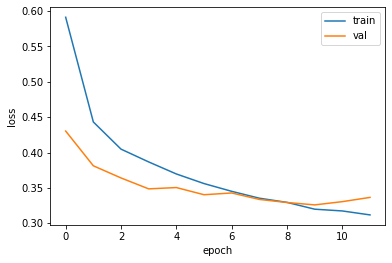

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()
#epoch=9에서 손실값이 최소이고 epoch=10,11에서 손실값이 증가하였기 때문에 11번째에서 훈련을 멈췄음을 알 수 있다.

In [51]:
#정확도 평가
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.885
